In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl


from sklearn import tree, ensemble, neighbors, model_selection, metrics
from sklearn import tree
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from IPython.display import display, HTML

In [2]:
songdb = pd.read_csv("topsongs.csv")
albumdb = pd.read_csv("topalbums.csv")
artistdb = pd.read_csv("topartists.csv")

nominations_songdb_2020 = pd.read_csv("2020songs.csv")
nominations_albumdb_2020 = pd.read_csv("2020albums.csv")
nominations_artistdb_2020 = pd.read_csv("2020artists.csv")

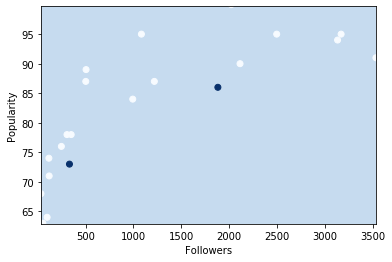

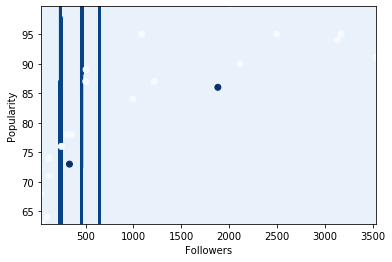

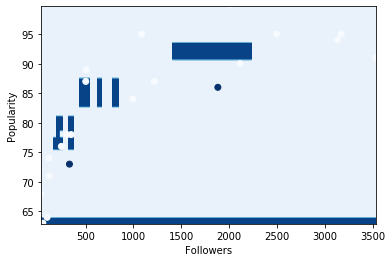

In [5]:
# Top artist predictions
artist_data = artistdb.copy().iloc[:,1:-1]

# Need to divide followers by a large number so the program won't hang when training
artist_data['Followers'] = artist_data['Followers']/10000
artist_target = artistdb.copy().iloc[:,-1:]
# artist_data

# Splits the data and target datasets into training and testing. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(artist_data, artist_target, test_size=0.2, random_state=109)

# Fits decision tree and linear SVC model
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
# tree.plot_tree(dt_clf.fit(song_data, song_target.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

h = 2 # Step size for mesh graph

# Graphs
x_min, x_max = X_test['Followers'].min()-.1, X_test['Followers'].max()+.1
y_min, y_max = X_test['Popularity'].min()-.1, X_test['Popularity'].max()+.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h/5))
# print (xx.ravel())
# print(yy)
titles = ['SVC with linear kernel', '5-nearest-neighbors'
          'Decision Tree']
pl.set_cmap(pl.cm.Paired)

# Plots out results
for i, clf in enumerate((linear_svc, knn, dt_clf)):
    # Plot the decision boundary
    predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    predict = predict.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, predict, cmap=plt.cm.Blues)
    pl.axis('tight')

    pl.scatter(X_test['Followers'], X_test['Popularity'], c=y_test.values.ravel(), cmap=plt.cm.Blues)
    pl.xlabel('Followers')
    pl.ylabel('Popularity')
    pl.show()


In [14]:
# Artist Predictions
# Refits using 100% of data and runs model on current year nominees to get predictions for winners

print("Artist predictions for 2020 Grammys")

dt_clf.fit(artist_data, artist_target.values.ravel())
knn.fit(artist_data, artist_target.values.ravel())
linear_svc.fit(artist_data, artist_target.values.ravel())
rfc.fit(artist_data, artist_target.values.ravel())

display(nominations_artistdb_2020)
artist_data_2020 = nominations_artistdb_2020.iloc[:,1:]
artist_data_2020['Followers'] = artist_data_2020['Followers']/10000

print(dt_clf.predict(np.c_[artist_data_2020]))
print(knn.predict(np.c_[artist_data_2020]))
print(linear_svc.predict(np.c_[artist_data_2020]))
print(rfc.predict(np.c_[artist_data_2020]))

Artist predictions for 2020 Grammys


,Name,Followers,Popularity
0,Black Pumas,71329,61
1,Billie Eilish,17055834,98
2,Lil Nas X,1900496,87
3,Lizzo,1602632,88
4,Maggie Rogers,509106,76
5,ROSALÍA,1970207,85
6,Tank and The Bangas,115219,50
7,Yola,26757,54


[1 0 1 0 0 1 1 1]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[1 0 0 0 0 0 1 1]


Best song testing/training using 9:1


,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
35,74,0.562,0.939,-4.282,0.0475,0.0460,0.1120,0.684,116.044
5,85,0.418,0.420,-6.444,0.0414,0.5880,0.1100,0.184,84.094
99,80,0.727,0.729,-2.990,0.3260,0.1710,0.0700,0.512,117.932
20,77,0.851,0.806,-4.620,0.0787,0.1180,0.1210,0.787,118.999
80,71,0.457,0.406,-7.462,0.0291,0.0800,0.1170,0.208,151.950
10,71,0.609,0.923,-3.908,0.0338,0.1600,0.2950,0.961,115.996
13,75,0.732,0.198,-11.775,0.0280,0.8830,0.0659,0.618,88.174
90,71,0.469,0.132,-14.001,0.0807,0.9290,0.0873,0.360,67.011
19,80,0.485,0.619,-7.115,0.0289,0.0941,0.1090,0.416,138.017
68,72,0.593,0.642,-7.284,0.0299,0.3130,0.0804,0.736,76.403


[0 0 0 1 0 0 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0]


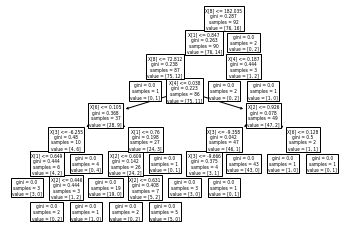

In [8]:
# Best Song testing/training
print("Best song testing/training using 9:1")
# Splits the dataset into the parameters and the target
song_data = songdb.copy().iloc[:,2:-1]
song_target = songdb.copy().iloc[:,-1:]

# Splits the data and target datasets into training and testing, at 9:1 split. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(song_data, song_target, test_size=0.1, random_state=4)
display(X_test)

# Fits decision tree and other models using 90% of data
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
tree.plot_tree(dt_clf.fit(X_train, y_train.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

# Tests output with remaining 10%
print(dt_clf.predict(np.c_[X_test]))
print(knn.predict(np.c_[X_test]))
print(linear_svc.predict(np.c_[X_test]))
print(rfc.predict(np.c_[X_test]))

In [9]:
# Song Predictions
# Refits using 100% of data and runs model on current year nominees to get predictions for winners

print("Song predictions for 2020 Grammys")

dt_clf.fit(song_data, song_target.values.ravel())
knn.fit(song_data, song_target.values.ravel())
linear_svc.fit(song_data, song_target.values.ravel())
rfc.fit(song_data, song_target.values.ravel())

display(nominations_songdb_2020)
song_data_2020 = nominations_songdb_2020.iloc[:,2:]
print(dt_clf.predict(np.c_[song_data_2020]))
print(knn.predict(np.c_[song_data_2020]))
print(linear_svc.predict(np.c_[song_data_2020]))
print(rfc.predict(np.c_[song_data_2020]))

Song predictions for 2020 Grammys


,Name,Date Released,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
0,Always Remember Us This Way,2018-10-05,82,0.553,0.502,-5.972,0.0409,0.299,0.7640,0.296,129.976
1,bad guy,2019-03-29,96,0.701,0.425,-10.965,0.3750,0.328,0.1000,0.562,135.128
2,Bring My Flowers Now,2019-08-23,42,0.557,0.198,-9.911,0.0461,0.948,0.2170,0.336,133.823
3,Hard Place,2018-11-02,70,0.614,0.719,-4.694,0.0955,0.179,0.1630,0.340,160.075
4,Lover,2019-08-23,88,0.359,0.543,-7.582,0.0919,0.492,0.1180,0.453,68.534
5,Norman fucking Rockwell,2019-08-30,77,0.218,0.215,-12.490,0.0368,0.967,0.0948,0.138,76.740
6,Someone You Loved,2019-05-17,96,0.501,0.405,-5.679,0.0319,0.751,0.1050,0.446,109.891
7,Truth Hurts,2019-05-03,91,0.715,0.624,-3.046,0.1140,0.110,0.1230,0.412,158.087


[0 1 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]


Best album testing/training using 9:1


,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
81,76,0.353167,0.695083,-6.223917,0.048558,0.215933,0.197825,0.257942,131.633083
30,76,0.622250,0.650083,-5.270833,0.043192,0.372592,0.168733,0.515833,121.895667
60,50,0.639929,0.461929,-9.782714,0.086657,0.276246,0.273957,0.304964,108.684143
24,18,0.538316,0.765158,-6.230789,0.050042,0.128993,0.402911,0.498316,113.683895
16,42,0.481750,0.424583,-9.704000,0.063525,0.605500,0.162325,0.367550,118.475167
23,77,0.779133,0.760000,-4.484733,0.064060,0.062877,0.146833,0.731200,120.987133
2,77,0.581091,0.534091,-6.081727,0.036018,0.439371,0.117536,0.414636,133.496909
27,80,0.668529,0.916882,-2.503000,0.246659,0.152594,0.304494,0.548176,114.816529
28,39,0.656500,0.749583,-4.752583,0.057950,0.104052,0.211175,0.604250,132.920167
13,0,0.560053,0.216189,-15.452158,0.069042,0.858053,0.152063,0.552000,112.174632


[1 0 0 0 0 1 1 0 0 1 0]
[0 0 0 0 1 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 1 0]


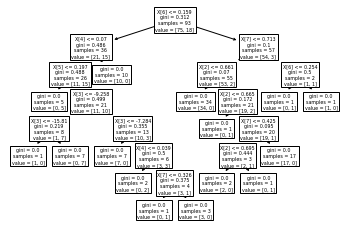

In [10]:
# Best Album testing/training
print("Best album testing/training using 9:1")

# Splits the dataset into the parameters and the target
album_data = albumdb.copy().iloc[:,2:-1]
album_target = albumdb.copy().iloc[:,-1:]

# Splits the data and target datasets into training and testing, at 7:3 split. Uses random seed to pick and choose data
X_train, X_test, y_train, y_test = train_test_split(album_data, album_target, test_size=0.1, random_state=2)
display(X_test)

# Fits decision tree and other models to the 90%
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train.values.ravel())
tree.plot_tree(dt_clf.fit(X_train, y_train.values.ravel())) 

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())

linear_svc = svm.SVC(kernel='linear', gamma='auto')
linear_svc.fit(X_train, y_train.values.ravel())

rfc = ensemble.RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train.values.ravel())

# Prints results of testing these models to the 10%
print(dt_clf.predict(np.c_[X_test]))
print(knn.predict(np.c_[X_test]))
print(linear_svc.predict(np.c_[X_test]))
print(rfc.predict(np.c_[X_test]))

In [11]:
# Best album predictions
# Refits using 100% of data and runs model on current year nominees to get predictions for winners

print("Album predictions for 2020 Grammys")

dt_clf.fit(album_data, album_target.values.ravel())
knn.fit(album_data, album_target.values.ravel())
linear_svc.fit(album_data, album_target.values.ravel())
rfc.fit(album_data, album_target.values.ravel())

display(nominations_albumdb_2020)
album_data_2020 = nominations_albumdb_2020.iloc[:,2:]
print(dt_clf.predict(np.c_[album_data_2020]))
print(knn.predict(np.c_[album_data_2020]))
print(linear_svc.predict(np.c_[album_data_2020]))
print(rfc.predict(np.c_[album_data_2020]))

Album predictions for 2020 Grammys


,Name,Date Released,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
0,"i,i",2019-08-09,58,0.465231,0.324862,-12.271923,0.098315,0.875923,0.239092,0.249631,106.955769
1,Norman Fucking Rockwell!,2019-08-30,77,0.434214,0.271457,-11.989429,0.042664,0.823000,0.120293,0.228979,97.773857
2,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",2019-03-29,96,0.583786,0.281721,-15.085071,0.193086,0.656857,0.239307,0.288007,105.494286
3,"thank u, next",2019-02-08,89,0.668250,0.525583,-6.622000,0.141642,0.298733,0.154742,0.388917,113.231167
4,I Used To Know Her,2019-08-30,60,0.549263,0.492421,-9.299053,0.165763,0.471753,0.167553,0.370826,107.297263
5,7 EP,2019-06-21,88,0.751500,0.586625,-6.646625,0.110963,0.152750,0.158362,0.531375,142.742375
6,Cuz I Love You,2019-04-19,67,0.706818,0.731545,-4.324364,0.129882,0.051543,0.304291,0.631727,127.846545
7,Father of the Bride,2019-05-03,62,0.642389,0.504167,-7.761889,0.062189,0.522978,0.168917,0.527778,118.150222


[1 1 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0]


In [12]:
# Functions used to plot radar graphs. Second function is different in that it plots two on top of each other

def radar_graph(labels, stats, title):
    # Radar graph
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.ylim(0,1)
    ax.set_title(title)
    ax.grid(True)
    
def radar_graphs(labels, stats, stats2, title):
    # Radar graphs
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    stats=np.concatenate((stats,[stats[0]]))
    stats2=np.concatenate((stats2,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))

    fig=plt.figure()
    ax = fig.add_subplot(111, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=2, c="Blue")
    ax.fill(angles, stats, alpha=0.25, c="Blue")
    ax.plot(angles, stats2, 'o-', linewidth=2, c="Yellow")
    ax.fill(angles, stats2, alpha=0.25, fc="Yellow")
    ax.set_thetagrids(angles * 180/np.pi, labels)
    plt.ylim(0,1)
    ax.set_title(title)
    ax.grid(True)

What did the winners do differently?


,Category,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
0,Nominees,61.795181,0.601985,0.617797,-7.523622,0.122675,0.247663,0.198577,0.483581,118.622487
1,Winners,53.238095,0.561737,0.519176,-8.798392,0.055596,0.400329,0.143830,0.445964,118.141397


,Category,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Valence,Tempo
0,Nominees,70.421687,0.60212,0.595964,-6.620506,0.077748,0.293924,0.168978,0.442589,119.906337
1,Winners,74.150000,0.59940,0.570750,-6.407150,0.060615,0.244627,0.157510,0.476050,114.108300


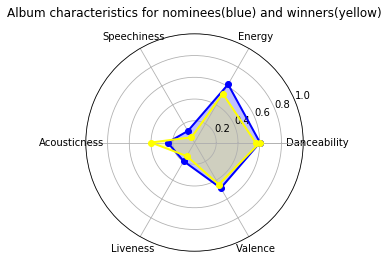

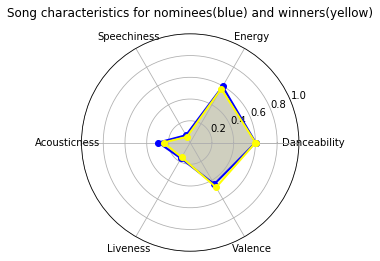

In [13]:
# Album characteristics

print("What did the winners do differently?")

labels = np.array(['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence'])
album_averages = albumdb.loc[:,labels].values.mean(axis=0)
album_winner_averages = albumdb.loc[albumdb['Did They Win?'] == 1,labels].values.mean(axis=0)
album_nominee_averages = albumdb.loc[albumdb['Did They Win?'] == 0,labels].values.mean(axis=0)

# Constructs table including info such as loudness and tempo
album_characteristics = pd.DataFrame([album_data.loc[album_target['Did They Win?'] == 0].values.mean(axis=0), album_data.loc[album_target['Did They Win?'] == 1].values.mean(axis=0)], columns = album_data.columns.values) 
album_characteristics.insert(0, 'Category', ["Nominees", "Winners"])

# Outputs
radar_graphs(labels, album_nominee_averages, album_winner_averages, "Album characteristics for nominees(blue) and winners(yellow)")
display(album_characteristics)


# Song characteristics

labels = np.array(['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Liveness', 'Valence'])
song_averages = songdb.loc[:,labels].values.mean(axis=0)
song_winner_averages = songdb.loc[songdb['Did They Win?'] == 1,labels].values.mean(axis=0)
song_nominee_averages = songdb.loc[songdb['Did They Win?'] == 0,labels].values.mean(axis=0)

# Constructs table including info such as loudness and tempo
song_characteristics = pd.DataFrame([song_data.loc[song_target['Did They Win?'] == 0].values.mean(axis=0), song_data.loc[song_target['Did They Win?'] == 1].values.mean(axis=0)], columns = song_data.columns.values) 
song_characteristics.insert(0, 'Category', ["Nominees", "Winners"])

# Outputs
radar_graphs(labels, song_nominee_averages, song_winner_averages, "Song characteristics for nominees(blue) and winners(yellow)")
display(song_characteristics)